In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
# Reading files into individual dfs

file = pd.ExcelFile('C:\\Users\\sachin\\Desktop\\DataQuest\\My Projects\\Siddesh Assignment\\Analytical Interview DATASET.xlsx')
profile = pd.read_excel(file,'Customer Profile Data (DS#1)')
past_purchase = pd.read_excel(file,'Past Purchase Data (Ds#2)')
camp_coverage = pd.read_excel(file,'Campaign Coverage Data (DS#3)')
monthly_data = pd.read_excel(file,'Month Level Customer Data (DS#4')
socio_economic = pd.read_excel(file,'Socio Economic Data (DS#5)')


In [128]:
yearly_data = monthly_data.groupby(by = 'Customer_ID').sum()
#Turning monthly to yearly data to match other dfs

In [129]:
yearly_data['Net_Margin'] = yearly_data['Net_Profit']/ yearly_data['Revenue']*100

#Recalculated Net_Margin

In [130]:
master = (profile.join(past_purchase,on = 'Customer_ID', how='left',lsuffix='_left')
                 .join(camp_coverage,on='Customer_ID',how='left',lsuffix='_left')
                 .join(monthly_data,on='Customer_ID',how='left',lsuffix='_left')
                 .join(socio_economic,on='Customer_ID',how='left',lsuffix='_left'))
                


In [131]:
master = master.drop({'Customer_ID','Customer_ID_left'}, axis=1)


In [132]:
master.head()

,age,job,marital_status,education,Previous_Default_Flag,House_Owned_Flag,Loan_Availed_Flag,Income_USD,Credit_rating,Life_Stage_Code,...,Revenue,Cost,Net_Profit,Net_Margin,month_last_contacted,Qtrly_Emp_variation_rate,Monthly_consumer_price_idx,Monthly_consumer_conf_idx,US_FED_3mnth_rate,Quarterly_num_of_emp
0,85,retired,married,basic.4y,no,no,no,10307,Poor,Tradinationalist,...,1563.66,1376.0208,187.6392,0.12,may,1.1,93.994,-36.4,4.864,5191.0
1,50,blue-collar,married,basic.9y,no,no,no,33232,Fair,Baby Boomers,...,820.49,713.8263,106.6637,0.13,may,1.1,93.994,-36.4,4.864,5191.0
2,47,blue-collar,single,basic.4y,NaN,no,no,12167,Fair,Baby Boomers,...,372.33,331.3737,40.9563,0.11,may,1.1,93.994,-36.4,4.864,5191.0
3,26,technician,divorced,professional.course,no,no,yes,26459,Good,Gen Y,...,312.84,275.2992,37.5408,0.12,may,1.1,93.994,-36.4,4.864,5191.0
4,52,retired,married,university.degree,NaN,no,no,22328,Good,Baby Boomers,...,595.63,518.1981,77.4319,0.13,may,1.1,93.994,-36.4,4.864,5191.0


In [133]:
master['Loyalty_Tier'].value_counts()

Bronze      1982
Silver      1569
Gold        1049
Platinum     547
Name: Loyalty_Tier, dtype: int64

In [134]:
mapping_dict = {'Bronze':1,'Silver':2, 'Gold':3, 'Platinum': 4}

master['Loyalty_Tier'] = master['Loyalty_Tier'].map(mapping_dict)

In [135]:
mapping_dict = {'yes':1,
               'no':2,
               np.nan:0,
               }

master['Previous_Default_Flag'] = master['Previous_Default_Flag'].map(mapping_dict)

master['House_Owned_Flag'] = master['House_Owned_Flag'].map(mapping_dict)
master['Loan_Availed_Flag'] = master['Loan_Availed_Flag'].map(mapping_dict)
master['buy_decision_flag'] = master['buy_decision_flag'].map(mapping_dict)


In [136]:
master.head()

,age,job,marital_status,education,Previous_Default_Flag,House_Owned_Flag,Loan_Availed_Flag,Income_USD,Credit_rating,Life_Stage_Code,...,Revenue,Cost,Net_Profit,Net_Margin,month_last_contacted,Qtrly_Emp_variation_rate,Monthly_consumer_price_idx,Monthly_consumer_conf_idx,US_FED_3mnth_rate,Quarterly_num_of_emp
0,85,retired,married,basic.4y,2,2,2,10307,Poor,Tradinationalist,...,1563.66,1376.0208,187.6392,0.12,may,1.1,93.994,-36.4,4.864,5191.0
1,50,blue-collar,married,basic.9y,2,2,2,33232,Fair,Baby Boomers,...,820.49,713.8263,106.6637,0.13,may,1.1,93.994,-36.4,4.864,5191.0
2,47,blue-collar,single,basic.4y,0,2,2,12167,Fair,Baby Boomers,...,372.33,331.3737,40.9563,0.11,may,1.1,93.994,-36.4,4.864,5191.0
3,26,technician,divorced,professional.course,2,2,1,26459,Good,Gen Y,...,312.84,275.2992,37.5408,0.12,may,1.1,93.994,-36.4,4.864,5191.0
4,52,retired,married,university.degree,0,2,2,22328,Good,Baby Boomers,...,595.63,518.1981,77.4319,0.13,may,1.1,93.994,-36.4,4.864,5191.0


In [137]:
master['marital_status'].value_counts()


married     3171
single      1401
divorced     564
unknown       12
Name: marital_status, dtype: int64

In [138]:
mapping_dict = ({
    
    'married':1,
    'single':2,
    'divorced':3,
    'unknown':0
    
})

master['marital_status'] = master['marital_status'].map(mapping_dict)

In [139]:
master['days_elapsed_last_contact'] =  master['days_elapsed_last_contact'].replace(999,0)

master['days_elapsed_last_contact'].value_counts()

0.0     4958
3.0       55
6.0       49
4.0       22
9.0       11
7.0        9
10.0       8
2.0        7
13.0       5
12.0       5
16.0       3
11.0       3
5.0        3
15.0       2
1.0        2
8.0        1
22.0       1
26.0       1
17.0       1
Name: days_elapsed_last_contact, dtype: int64

In [140]:
master['education'].value_counts()

university.degree      1534
high.school            1328
basic.9y                764
professional.course     643
basic.4y                571
basic.6y                305
illiterate                3
Name: education, dtype: int64

In [141]:
mapping_dict = ({
                    "university.degree":1,
                    "high.school":2,
                    "basic.9y":3,
                    "professional.course":4,
                    "basic.4y":5,
                    "basic.6y":6,
                    "illiterate":7
                    
                    
    
                })

master['education'] = master['education'].map(mapping_dict)

In [142]:
master['Credit_rating'].value_counts()

Fair         1625
Poor         1223
Good         1048
Excellent    1016
High Risk     236
Name: Credit_rating, dtype: int64

In [143]:
mapping_dict = {'High Risk':1,'Poor':2,'Fair':3,'Good':4,'Excellent':5}

master['Credit_rating'] = master['Credit_rating'].map(mapping_dict)

master['Credit_rating'].value_counts()

3    1625
2    1223
4    1048
5    1016
1     236
Name: Credit_rating, dtype: int64

In [144]:
master = master.fillna(0)

In [145]:
X = (master[['age',
             'Income_USD',
             'marital_status',
             'Count_of_Transactions',
             'Avg_Basket_Size', 
             'duration_last_contact',
             'num_of_contact_campaign',
             'days_elapsed_last_contact',
             'num_contact_before_campaigning',
             'Target_buy',
             'Revenue',
             'Cost',
             'Net_Profit',
             'Net_Margin',
             'Qtrly_Emp_variation_rate',
             'Credit_rating','education', 
             ' Monthly_consumer_price_idx', 
             'US_FED_3mnth_rate',
             'Quarterly_num_of_emp',
            'Loan_Availed_Flag',
            'House_Owned_Flag',
            'Previous_Default_Flag',
            'Loyalty_Tier']])

In [146]:
y = master['buy_decision_flag']

In [147]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4118, 24) (4118,)
Test set: (1030, 24) (1030,)


In [155]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [156]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [157]:
from sklearn import metrics
print("Train set Accuracy: ",metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: " ,metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9985429820301117
Test set Accuracy:  0.9980582524271845


In [152]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9961165 , 0.99708738, 0.9961165 , 0.99708738, 0.99805825,
       0.99708738, 0.99805825, 0.99805825, 0.99805825])

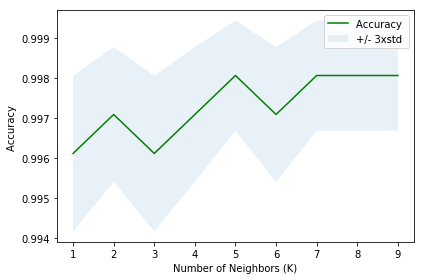

In [154]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()